# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework Assignment #10 submission</b></u>

### Student Name: HUY NGUYEN
### Student ID: 015207465
### Email address: huy.l.nguyen@sjsu.edu

##  <u>Solution</u>

In [ ]:
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import keras

In [3]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_valid, y_train, y_validation = train_test_split(x_train_valid,
                                                           y_train_valid,
                                                           test_size=0.2,
                                                           random_state=0)

x_train = x_train.astype("float32") / 255
x_valid = x_valid.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape(-1, 784)
x_valid = x_valid.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train.shape, x_valid.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [4]:
layer_dataset = Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(layer_dataset)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# reconstruction model:
autoencoder = keras.Model(layer_dataset, decoded)

# encoder model:
encoder = keras.Model(layer_dataset, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136

In [5]:
autoencoder.compile(optimizer='adam', loss='mse')
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir="/tmp/autoencoder",
                                                 histogram_freq=1,
                                                 profile_batch='500,520')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_valid, x_valid),
                callbacks=[tboard_callback])

[TensorBoard(log_dir='/tmp/autoencoder', histogram_freq=0, write_graph=True)]

Epoch 1/30
24/24 [==============================] - 1s 44ms/step - loss: 0.1462 - val_loss: 0.0843
Epoch 2/30
24/24 [==============================] - 1s 23ms/step - loss: 0.0751 - val_loss: 0.0571
Epoch 3/30
24/24 [==============================] - 1s 23ms/step - loss: 0.0534 - val_loss: 0.0464
Epoch 4/30
24/24 [==============================] - 1s 22ms/step - loss: 0.0443 - val_loss: 0.0391
Epoch 5/30
24/24 [==============================] - 1s 22ms/step - loss: 0.0376 - val_loss: 0.0343
Epoch 6/30
24/24 [==============================] - 1s 22ms/step - loss: 0.0334 - val_loss: 0.0304
Epoch 7/30
24/24 [==============================] - 1s 22ms/step - loss: 0.0296 - val_loss: 0.0278
Epoch 8/30
24/24 [==============================] - 1s 23ms/step - loss: 0.0274 - val_loss: 0.0266
Epoch 9/30
24/24 [==============================] - 1s 22ms/step - loss: 0.0260 - val_loss: 0.0253
Epoch 10/30
24/24 [==============================] - 1s 23ms/step - loss: 0.0253 - val_loss: 0.0246
Epoch 11/

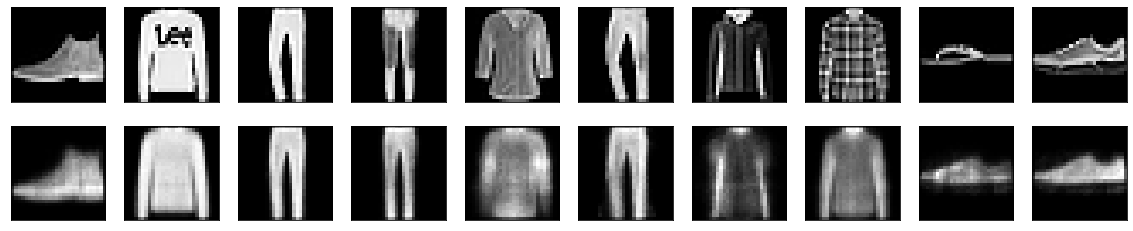

In [6]:
n = 10
predict = autoencoder.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predict[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
% load_ext tensorboard
% tensorboard --logdir= / tmp / autoencoder

In [8]:
# Reshape image
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_valid.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
# Perform convolution
layer_dataset = Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(layer_dataset)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(layer_dataset, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_valid, x_valid))

Epoch 1/30
24/24 [==============================] - 18s 741ms/step - loss: 0.6825 - val_loss: 0.5980
Epoch 2/30
24/24 [==============================] - 18s 738ms/step - loss: 0.5543 - val_loss: 0.4405
Epoch 3/30
24/24 [==============================] - 18s 761ms/step - loss: 0.4141 - val_loss: 0.3663
Epoch 4/30
24/24 [==============================] - 18s 751ms/step - loss: 0.3605 - val_loss: 0.3479
Epoch 5/30
24/24 [==============================] - 18s 752ms/step - loss: 0.3457 - val_loss: 0.3390
Epoch 6/30
24/24 [==============================] - 18s 755ms/step - loss: 0.3379 - val_loss: 0.3335
Epoch 7/30
24/24 [==============================] - 18s 745ms/step - loss: 0.3317 - val_loss: 0.3288
Epoch 8/30
24/24 [==============================] - 18s 746ms/step - loss: 0.3278 - val_loss: 0.3252
Epoch 9/30
24/24 [==============================] - 18s 753ms/step - loss: 0.3245 - val_loss: 0.3224
Epoch 10/30
24/24 [==============================] - 18s 752ms/step - loss: 0.3218 - val_lo

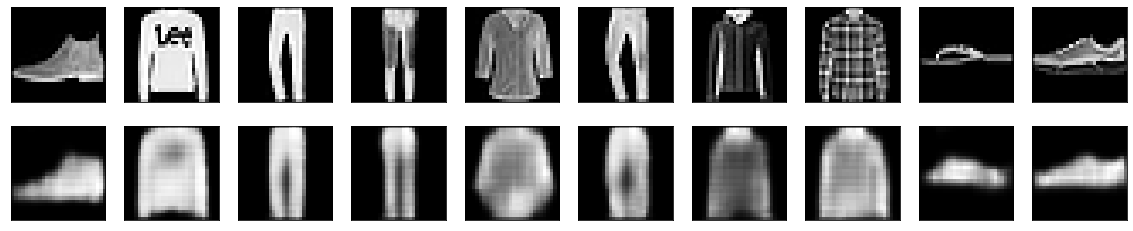

In [11]:
n = 10
predict = autoencoder.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predict[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
# Set noise factor
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_valid_noisy = x_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_valid.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

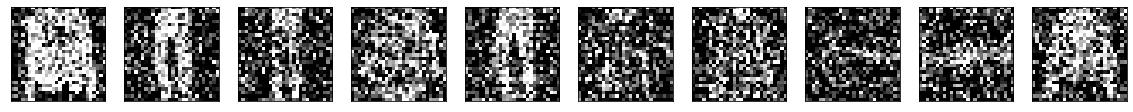

In [13]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
# Denoise model
layer_dataset = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(layer_dataset)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(layer_dataset, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 32)        0   

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_valid_noisy, x_valid))

Epoch 1/30
24/24 [==============================] - 37s 1s/step - loss: 0.6369 - val_loss: 0.3886
Epoch 2/30
24/24 [==============================] - 36s 1s/step - loss: 0.3759 - val_loss: 0.3452
Epoch 3/30
24/24 [==============================] - 38s 2s/step - loss: 0.3412 - val_loss: 0.3322
Epoch 4/30
24/24 [==============================] - 37s 2s/step - loss: 0.3307 - val_loss: 0.3263
Epoch 5/30
24/24 [==============================] - 37s 2s/step - loss: 0.3252 - val_loss: 0.3225
Epoch 6/30
24/24 [==============================] - 37s 2s/step - loss: 0.3225 - val_loss: 0.3188
Epoch 7/30
24/24 [==============================] - 37s 2s/step - loss: 0.3187 - val_loss: 0.3175
Epoch 8/30
24/24 [==============================] - 37s 2s/step - loss: 0.3168 - val_loss: 0.3147
Epoch 9/30
24/24 [==============================] - 37s 2s/step - loss: 0.3147 - val_loss: 0.3131
Epoch 10/30
24/24 [==============================] - 37s 2s/step - loss: 0.3129 - val_loss: 0.3122
Epoch 11/30
24/24 [

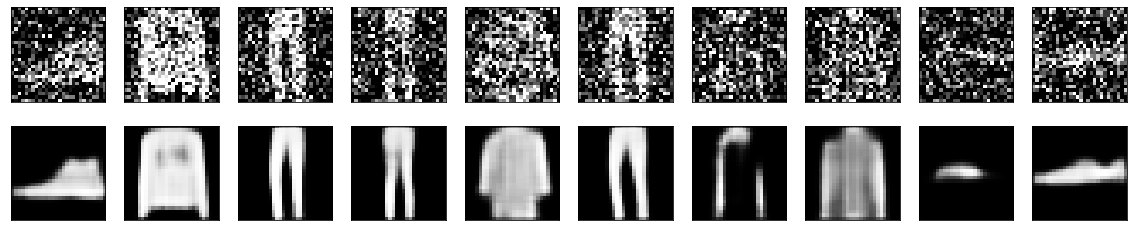

In [16]:
# Denoised
n = 10
predict = autoencoder.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predict[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()